In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

os.getcwd()

'/Users/A200154990/Langchain/Elect'

In [12]:
import pandas as pd
import os
import re

path = '/Users/A200154990/Langchain/Elect'

all_dfs = []

for file in os.listdir(path):
    if file.endswith('.csv'):
        file_path = os.path.join(path, file)
        with open(file_path, 'r') as f:
            lines = f.readlines()
        
        # Extract round number from first line
        round_line = lines[0].strip()
        match = re.search(r'Round\s+(\d+)', round_line)
        if match:
            round_number = int(match.group(1))
        else:
            continue  # Skip file if round number is not found
        
        # Read CSV skipping the first line (round info line)
        df = pd.read_csv(file_path, skiprows=1)
        
        # Add round as a new column
        df['Round'] = round_number
        
        all_dfs.append(df)

# Final concatenated DataFrame
final_df = pd.concat(all_dfs, ignore_index=True)

print(final_df)


                   Candidate                                   Party  \
0             KONETI SUJATHA                     Bahujan Samaj Party   
1           MAGANTI GOPINATH                  Bharat Rashtra Samithi   
2        MOHAMMED AZHARUDDIN                Indian National Congress   
3     M.D. RASHED FARAZUDDIN  All India Majlis-E-Ittehadul Muslimeen   
4       LANKALA DEEPAK REDDY                  Bharatiya Janata Party   
..                       ...                                     ...   
562  SIDDHARTHA CHAKRAVARTHY                             Independent   
563            SURABHI SINGH                             Independent   
564     SHIV SHANKAR REDDY.S                             Independent   
565                     NOTA                       None of the Above   
566                      NaN                                   Total   

     Votes Brought From Previous Rounds  Current Round  Total  Round  
0                                   202             30    232   

In [29]:
final_df.to_csv( '/Users/A200154990/Langchain/Elect/final_df.csv')

/var/folders/7y/t10qxx5s3dj1mj_3m8j2wqw00000gn/T/ipykernel_50243/2003790880.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_votes, x='Total', y='Candidate', palette='viridis')


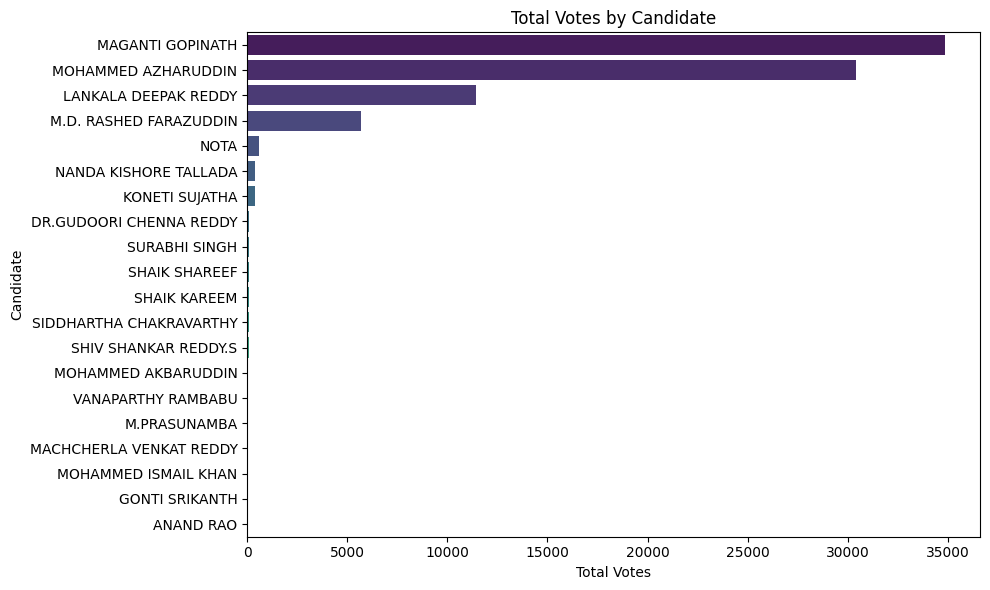

In [25]:
total_votes = df.groupby('Candidate')['Total'].max().reset_index().sort_values(by='Total', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=total_votes, x='Total', y='Candidate', palette='viridis')
plt.title('Total Votes by Candidate')
plt.xlabel('Total Votes')
plt.ylabel('Candidate')
plt.tight_layout()
plt.show()

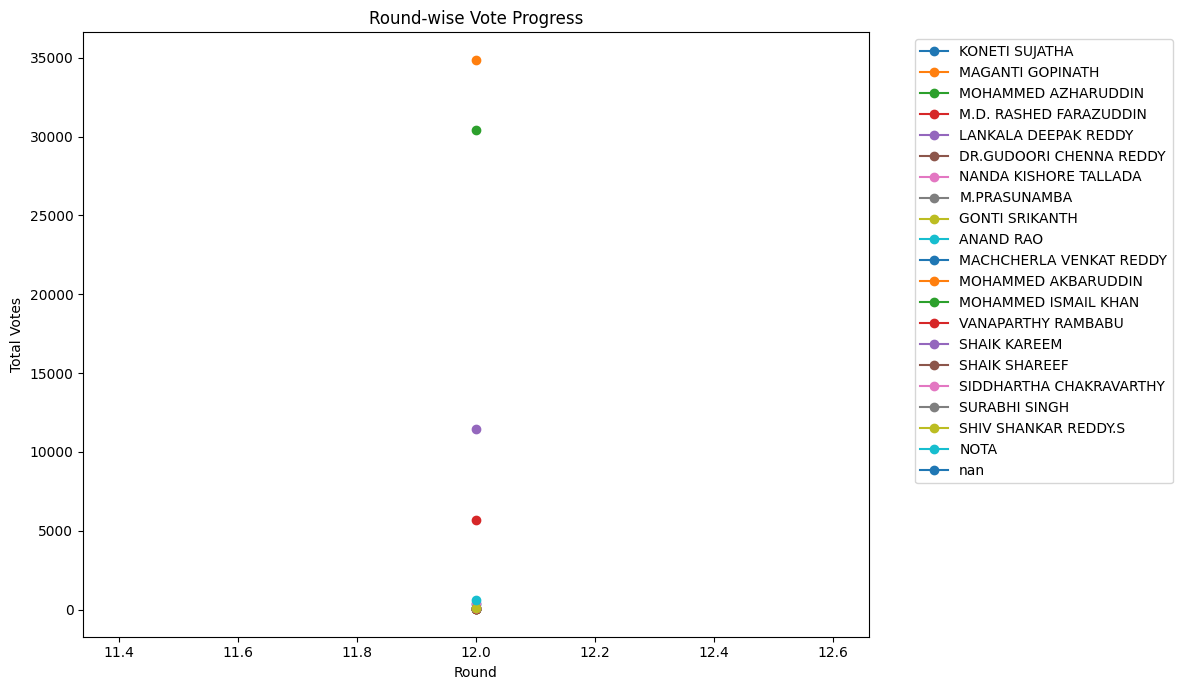

In [26]:
plt.figure(figsize=(12,7))
for candidate in df['Candidate'].unique():
    candidate_data = df[df['Candidate'] == candidate].sort_values(by='Round')
    plt.plot(candidate_data['Round'], candidate_data['Total'], marker='o', label=candidate)

plt.title('Round-wise Vote Progress')
plt.xlabel('Round')
plt.ylabel('Total Votes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### MOHAMMED AZHARUDDIN Vote Progress ###

             Candidate                     Party  \
2  MOHAMMED AZHARUDDIN  Indian National Congress   

   Votes Brought From Previous Rounds  Current Round  Total  Round  
2                               28331           2104  30435     12  


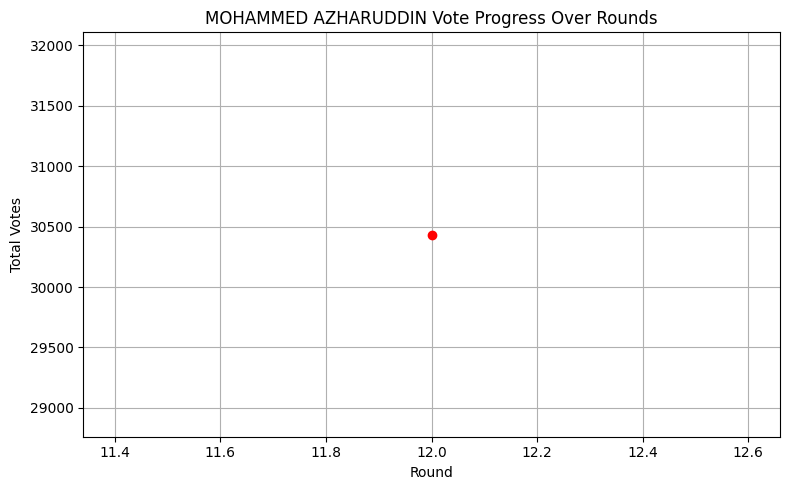

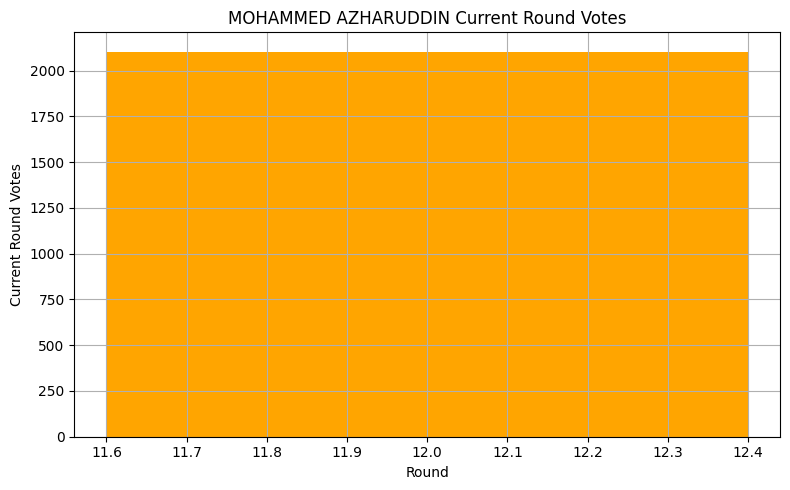

In [28]:
azhar_df = df[df['Candidate'].str.upper() == 'MOHAMMED AZHARUDDIN'].sort_values(by='Round')

print("\n### MOHAMMED AZHARUDDIN Vote Progress ###\n")
print(azhar_df)

plt.figure(figsize=(8,5))
plt.plot(azhar_df['Round'], azhar_df['Total'], marker='o', color='red')
plt.title('MOHAMMED AZHARUDDIN Vote Progress Over Rounds')
plt.xlabel('Round')
plt.ylabel('Total Votes')
plt.grid(True)
plt.tight_layout()
plt.show()

# Additional: Round-wise current votes change for Azhar
plt.figure(figsize=(8,5))
plt.bar(azhar_df['Round'], azhar_df['Current Round'], color='orange')
plt.title('MOHAMMED AZHARUDDIN Current Round Votes')
plt.xlabel('Round')
plt.ylabel('Current Round Votes')
plt.grid(True)
plt.tight_layout()
plt.show()